In [1]:
import nltk

In [2]:
from nltk.stem import PorterStemmer

In [3]:
porter = PorterStemmer()

In [4]:
porter.stem("Walking")

'walk'

In [5]:
porter.stem("Walked")

'walk'

In [6]:
porter.stem("walks")

'walk'

In [7]:
porter.stem("ran")

'ran'

In [8]:
porter.stem("running")

'run'

In [9]:
porter.stem("bosses")

'boss'

In [10]:
porter.stem("replacement")

'replac'

In [11]:
sentence = "Lemmatization is more sophisticated than stemming".split()

In [12]:
for token in sentence:
    print(porter.stem(token), end=" ")

lemmat is more sophist than stem 

In [13]:
porter.stem("unnecessary")

'unnecessari'

In [14]:
porter.stem("berry")

'berri'

In [15]:
from nltk.stem import WordNetLemmatizer

In [16]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
from nltk.corpus import wordnet

In [18]:
lemmatizer = WordNetLemmatizer()

In [19]:
lemmatizer.lemmatize("walking")

'walking'

In [20]:
lemmatizer.lemmatize("walking", pos=wordnet.VERB)

'walk'

In [21]:
lemmatizer.lemmatize("going")

'going'

In [22]:
lemmatizer.lemmatize("going", pos=wordnet.VERB)

'go'

In [23]:
lemmatizer.lemmatize("ran", pos=wordnet.VERB)

'run'

In [24]:
porter.stem("mice")

'mice'

In [25]:
lemmatizer.lemmatize("mice")

'mouse'

In [26]:
lemmatizer.lemmatize("houses")

'house'

In [27]:
porter.stem("was")

'wa'

In [28]:
lemmatizer.lemmatize("was",pos=wordnet.VERB)

'be'

In [29]:
porter.stem("is")

'is'

In [30]:
lemmatizer.lemmatize("is", pos=wordnet.VERB)

'be'

In [31]:
porter.stem("better")

'better'

In [32]:
lemmatizer.lemmatize("better", pos=wordnet.ADJ)

'good'

In [33]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [34]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [35]:
sentence = "Donald Trump has a devoted follwoing".split()

In [36]:
words_and_tags = nltk.pos_tag(sentence)
words_and_tags

[('Donald', 'NNP'),
 ('Trump', 'NNP'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('devoted', 'VBN'),
 ('follwoing', 'NN')]

In [37]:
for word, tag in words_and_tags:
    lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
    print(lemma, end=" ")

Donald Trump have a devote follwoing 

In [38]:
sentence = "The cat was following the bird as it flew by".split()

In [39]:
words_and_tags = nltk.pos_tag(sentence)
words_and_tags

[('The', 'DT'),
 ('cat', 'NN'),
 ('was', 'VBD'),
 ('following', 'VBG'),
 ('the', 'DT'),
 ('bird', 'NN'),
 ('as', 'IN'),
 ('it', 'PRP'),
 ('flew', 'VBD'),
 ('by', 'IN')]

In [40]:
for word, tag in words_and_tags:
    lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
    print(lemma, end=" ")

The cat be follow the bird a it fly by 

In [41]:
%config IPCompleter.greedy=True

# Basic Machine Learning Program For NLP

In [42]:
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [43]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [44]:
#pip install wget

In [45]:
### Not working
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
#!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

In [46]:
import requests

# URL of the file to download
url = "https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv"

# Destination path to save the downloaded file
output_path = "bbc_text_cls.csv"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open the output file in binary write mode and write the content
    with open(output_path, "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File downloaded successfully.


In [47]:
df = pd.read_csv('bbc_text_cls.csv')

In [48]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [49]:
inputs = df['text']
labels = df['labels']

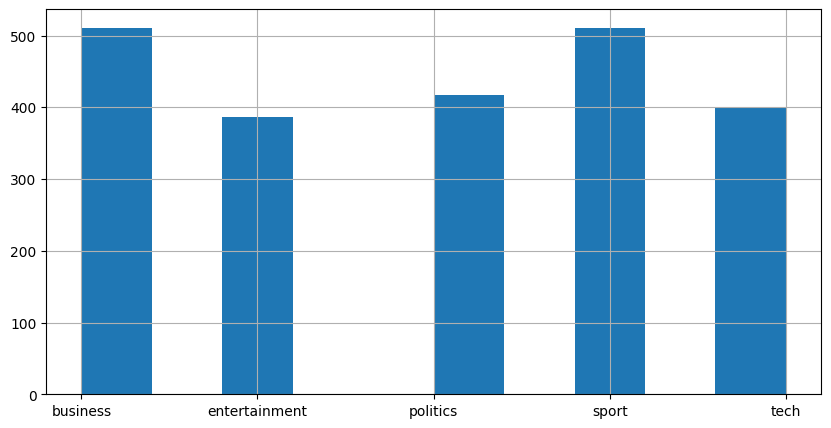

In [50]:
labels.hist(figsize=(10, 5));

In [51]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(
inputs, labels, random_state=123)

In [52]:
vectorizer = CountVectorizer()

In [53]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [54]:
Xtrain

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [55]:
(Xtrain != 0).sum()

337411

In [56]:
# what percentage of values are non-zero?
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.007695239935415004

In [57]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9922062350119905
test score: 0.9712746858168761


In [58]:
# with stopwords
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

train score: 0.9928057553956835
test score: 0.9766606822262118


In [59]:
Xtrain

<1668x25995 sparse matrix of type '<class 'numpy.int64'>'
	with 242123 stored elements in Compressed Sparse Row format>

In [60]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [61]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
               for word, tag in words_and_tags]

In [62]:
# With Lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9922062350119905
test score: 0.9676840215439856


In [63]:
Xtrain

<1668x26000 sparse matrix of type '<class 'numpy.int64'>'
	with 327738 stored elements in Compressed Sparse Row format>

In [64]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]

In [65]:
# With stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9892086330935251
test score: 0.9694793536804309


In [66]:
Xtrain

<1668x22828 sparse matrix of type '<class 'numpy.int64'>'
	with 335081 stored elements in Compressed Sparse Row format>

In [67]:
def simple_tokenizer(s):
    return s.split()

In [68]:
# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9952038369304557
test score: 0.9712746858168761


In [69]:
Xtrain

<1668x52144 sparse matrix of type '<class 'numpy.int64'>'
	with 369097 stored elements in Compressed Sparse Row format>